In [1]:
import numpy as np
import pandas as pd

# Carrega o arquivo .csv para um dataFrame


In [2]:
df = pd.read_csv("drive/MyDrive/Datasets/MICRODADOS.csv", encoding="latin1", sep=";")
df

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,Evolucao,CriterioConfirmacao,StatusNotificacao,Municipio,Bairro,FaixaEtaria,IdadeNaDataNotificacao,Sexo,RacaCor,Escolaridade,Gestante,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,2021-05-13,2021-03-12,2021-05-09,NaN,2021-05-13,NaN,NaN,NaN,NaN,Descartados,Cura,Laboratorial,Em Aberto,COLATINA,NOSSA SENHORA APARECIDA,50 a 59 anos,"50 anos, 11 meses, 16 dias",F,Parda,Educação superior completa,Não,Não,Sim,Sim,Não,Sim,Não,Sim,Não,Não,Não,Não,Sim,Não,Não,Não,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
1,2021-05-13,2021-05-11,2021-05-08,2021-05-11,NaN,NaN,NaN,NaN,NaN,Suspeito,Ignorado,-,Em Aberto,CACHOEIRO DE ITAPEMIRIM,ALTO UNIÃO,20 a 29 anos,"25 anos, 3 meses, 24 dias",F,Ignorado,Ensino médio completo (antigo colegial ou 2º g...,Não,Não,Não,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado,Não Informado
2,2021-05-13,2021-05-12,2021-05-09,2021-05-13,NaN,NaN,NaN,2021-05-13,NaN,Suspeito,-,Laboratorial,Encerrado,CARIACICA,SANTA CECÍLIA,50 a 59 anos,"56 anos, 2 meses, 1 dias",F,Parda,Ignorado,Não,Não,Não,Não,Sim,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado,Não Informado
3,2021-05-13,2021-05-12,2021-05-10,2021-05-13,NaN,NaN,NaN,2021-05-13,NaN,Suspeito,-,Laboratorial,Encerrado,CARIACICA,BANDEIRANTES,70 a 79 anos,"71 anos, 2 meses, 22 dias",M,Parda,Ignorado,Não se aplica,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado,Não Informado
4,2021-05-13,2021-05-12,2021-05-10,2021-05-13,NaN,NaN,NaN,NaN,NaN,Suspeito,-,-,Em Aberto,VILA VELHA,PAUL,40 a 49 anos,"45 anos, 5 meses, 23 dias",F,Branca,Ensino médio completo (antigo colegial ou 2º g...,Não,Não,Não,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390282,2020-02-27,2020-04-16,2020-02-15,2020-02-27,NaN,NaN,NaN,2020-04-16,NaN,Descartados,Ignorado,Laboratorial,Encerrado,VILA VELHA,JOCKEY DE ITAPARICA,30 a 39 anos,"39 anos, 9 meses, 26 dias",F,Ignorado,Ignorado,Não,Sim,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não Informado,Não Informado,Negativo,Não Informado,Não Informado,Não Informado,Não Informado
1390283,2020-02-27,2020-04-16,2020-02-15,2020-02-27,NaN,NaN,NaN,2020-04-16,NaN,Descartados,Ignorado,Laboratorial,Encerrado,VILA VELHA,JOCKEY DE ITAPARICA,0 a 4 anos,"4 anos, 11 meses, 26 dias",F,Ignorado,Ignorado,Não,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não Informado,Não,Não,Não,Não Informado,Não Informado,Negativo,Não Informado,Não Informado,Não Informado,Não Informado
1390284,2020-02-27,2020-04-15,2020-02-25,2020-02-26,NaN,NaN,NaN,2020-04-15,NaN,Descartados,Ignorado,Laboratorial,Encerrado,ARACRUZ,JEQUITIBÁ,20 a 29 anos,"25 anos, 7 meses, 25 dias",M,Ignorado,Ignorado,Não se aplica,Sim,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não Informado,Não Informado,Sim,Não,Não Informado,Não Informado,Negativo,Não Informado,Não Informado,Não Informado,Não Informado
1390285,2020-02-25,2020-04-16,2020-02-13,2020-02-26,NaN,NaN,NaN,2020-04-16,2020-04-16,Descartados,Óbito por

# Limpa os dados

In [3]:
# Avalia as colunas 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1390287 entries, 0 to 1390286
Data columns (total 45 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   DataNotificacao          1390287 non-null  object
 1   DataCadastro             1390287 non-null  object
 2   DataDiagnostico          1390287 non-null  object
 3   DataColeta_RT_PCR        695875 non-null   object
 4   DataColetaTesteRapido    447942 non-null   object
 5   DataColetaSorologia      80830 non-null    object
 6   DataColetaSorologiaIGG   125588 non-null   object
 7   DataEncerramento         1186965 non-null  object
 8   DataObito                12991 non-null    object
 9   Classificacao            1390287 non-null  object
 10  Evolucao                 1390287 non-null  object
 11  CriterioConfirmacao      1390287 non-null  object
 12  StatusNotificacao        1390287 non-null  object
 13  Municipio                1390287 non-null  object
 14  Ba

In [4]:
# Exclui algumas colunas
df = df.drop(columns=['DataNotificacao','DataCadastro',	'DataDiagnostico','DataColeta_RT_PCR',	'DataColetaTesteRapido', 
                      'DataColetaSorologia', 'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito','Evolucao', 
                      'CriterioConfirmacao','StatusNotificacao', 'Municipio','Bairro', 'Escolaridade', 'Gestante',
                      'IdadeNaDataNotificacao','ViagemBrasil', 'ViagemInternacional', 'ProfissionalSaude', 'PossuiDeficiencia',
                      'MoradorDeRua','FicouInternado','RacaCor', 'TipoTesteRapido'])


In [5]:
df

,Classificacao,FaixaEtaria,Sexo,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG
0,Descartados,50 a 59 anos,F,Não,Sim,Sim,Não,Sim,Não,Sim,Não,Não,Não,Não,Sim,Não,Não Informado,Negativo,Não Informado,Não Informado
1,Suspeito,20 a 29 anos,F,Não,Não,Não,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado
2,Suspeito,50 a 59 anos,F,Não,Não,Não,Sim,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado
3,Suspeito,70 a 79 anos,M,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado
4,Suspeito,40 a 49 anos,F,Não,Não,Sim,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390282,Descartados,30 a 39 anos,F,Sim,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Negativo,Não Informado,Não Informado,Não Informado
1390283,Descartados,0 a 4 anos,F,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Negativo,Não Informado,Não Informado,Não Informado
1390284,Descartados,20 a 29 anos,M,Sim,Não,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não,Negativo,Não Informado,Não Informado,Não Informado
1390285,Descartados,50 a 59 anos,M,Sim,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Negativo,Não Informado,Não Informado,Não Informado


In [6]:
# Avalia o conteúdo das colunas
for col in df.columns: 
  print("\033[1m",col, "\033[0;0m")
  distinct_values = set(df[col])
  for c in set(df[col]): print (c, len(df[df[col]==c]), sep=':')
  print('\n')
  

 Classificacao 
Confirmados:455400
Descartados:681675
Suspeito:253212


 FaixaEtaria 
60 a 69 anos:102543
20 a 29 anos:273107
70 a 79 anos:43821
0 a 4 anos:49943
90 anos ou mais:4703
05 a 9 anos:29792
10 a 19 anos:100119
50 a 59 anos:177048
-:55
30 a 39 anos:329302
80 a 89 anos:19338
40 a 49 anos:260516


 Sexo 
F:776010
I:358
M:613919


 Febre 
Não:918894
Sim:469856
-:1537


 DificuldadeRespiratoria 
Não:1194079
Sim:194792
-:1416


 Tosse 
Não:729089
Sim:659777
-:1421


 Coriza 
Não:896885
Sim:491971
-:1431


 DorGarganta 
Não:971613
Sim:417096
-:1578


 Diarreia 
Não:1193230
Sim:195504
-:1553


 Cefaleia 
Não:759962
Sim:628628
-:1697


 ComorbidadePulmao 
Não:1347527
Sim:40887
-:1873


 ComorbidadeCardio 
Não:1227490
Sim:161017
-:1780


 ComorbidadeRenal 
Não:1383337
Sim:5256
-:1694


 ComorbidadeDiabetes 
Não:1333085
Sim:55377
-:1825


 ComorbidadeTabagismo 
Não:1360906
Sim:27598
-:1783


 ComorbidadeObesidade 
Não:1359477
Sim:28344
-:2466


 ResultadoRT_PCR 
Negativo:364063
Positiv

In [7]:
# Exclui linhas que possuem algum campo com '-'
for col in df.columns: 
    df.drop(df[df[col]=='-'].index, inplace=True)
  
# Exclui linhas onde Sexo = 'I'
df.drop(df[df['Sexo']=='I'].index, inplace=True)

# Exclui Classificacao = 'Suspeito'
df.drop(df[df['Classificacao']=='Suspeito'].index, inplace=True)

In [8]:
# Utiliza o LabelEncoder
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
  #Aplica o Label Encoder
  if df[column].dtype == 'object':
    encoder_ = LabelEncoder().fit(df[column])
    df[column] = encoder_.transform(df[column])
                

In [9]:
df

,Classificacao,FaixaEtaria,Sexo,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG
0,1,6,0,0,1,1,0,1,0,1,0,0,0,0,1,0,2,1,1,1
8,1,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1
17,0,7,1,0,1,1,0,0,0,0,0,1,0,0,0,0,2,3,1,1
20,0,7,0,1,0,1,1,1,0,1,0,1,0,0,0,0,2,3,1,1
21,0,7,1,0,1,1,0,0,0,0,0,1,0,1,0,0,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390282,1,4,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,2,1,1
1390283,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,2,1,1
1390284,1,3,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1
1390285,1,6,1,1,1,1,0,1,0,0,0,0,0,0,0,0,1,2,1,1


# Separação Teste/Treino

In [10]:
from sklearn.model_selection import train_test_split

X = df.loc[:,(df.columns != 'Classificacao')]
y = df['Classificacao']

X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      test_size=0.3,
                                                      random_state=42)

In [11]:
class_names=['Descartados', 'Confirmados']

In [12]:
 def matrix_confusao(y_test, y_pred, labels):
    from sklearn.metrics import confusion_matrix  
    from sklearn.metrics import accuracy_score
    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    %matplotlib inline
    cm = confusion_matrix(y_test, y_pred) 
    sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=True,
                xticklabels=labels, yticklabels=labels, cmap='YlGnBu')
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')

# Regressão Logística

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Cria objeto do classificador - LogisticRegression
clf_log = LogisticRegression(max_iter=10000)
model = GridSearchCV(estimator=clf_log, 
                     param_grid={}, 
                     cv=10, 
                     n_jobs=2, 
                     scoring='r2')


In [14]:
# Treina o modelo com o dataset de treino
model.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='r2', verbose=0)

In [15]:
print()
print(model.best_params_)
print('R2 %.2f%%' % (model.best_score_*100))


{}
R2 82.84%


In [16]:
# Faz predição com o dataset de teste (valid) 
y_pred = model.predict(X_valid)
print('R2: %.2f%%' % (model.score(X_valid, y_valid)*100))

R2: 82.83%


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean square error:  %.2f' % mean_squared_error(y_valid, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_valid, y_pred))
# The coefficient of determination: 100% is perfect prediction
print('Coefficient of determination (R2): %.2f%%' % (r2_score(y_valid, y_pred)*100))
print('\n\n')
from sklearn import metrics
print(metrics.classification_report(y_valid, y_pred, target_names=class_names))

Mean square error:  0.04
Mean absolute error: 0.04
Coefficient of determination (R2): 82.83%



              precision    recall  f1-score   support

 Descartados       0.97      0.93      0.95    136147
 Confirmados       0.95      0.98      0.97    203913

    accuracy                           0.96    340060
   macro avg       0.96      0.95      0.96    340060
weighted avg       0.96      0.96      0.96    340060



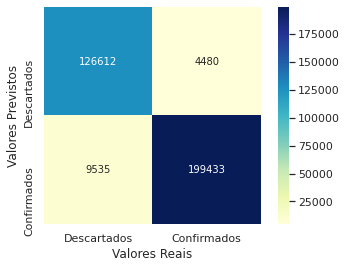

In [18]:
matrix_confusao(y_valid,
                y_pred,
                class_names)

# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
# Cria objeto do classificador -  Gaussiano
model = GaussianNB()

In [21]:
# Treina o modelo com o dataset de treino
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
#Faz predição com o dataset de teste (valid) 
y_pred = model.predict(X_valid)
print('R2: %.2f%%' % (model.score(X_valid, y_valid)*100))

R2: 88.66%


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean square error:  %.2f' % mean_squared_error(y_valid, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_valid, y_pred))
#O coeficiente de determinação: 100% é a predição prefeita.
print('Coefficient of determination (R2): %.2f%%' % (r2_score(y_valid, y_pred)*100))
print('\n\n')

from sklearn import metrics
print(metrics.classification_report(y_valid, y_pred, target_names=class_names))

Mean square error:  0.11
Mean absolute error: 0.11
Coefficient of determination (R2): 52.76%



              precision    recall  f1-score   support

 Descartados       0.82      0.92      0.87    136147
 Confirmados       0.94      0.86      0.90    203913

    accuracy                           0.89    340060
   macro avg       0.88      0.89      0.88    340060
weighted avg       0.89      0.89      0.89    340060



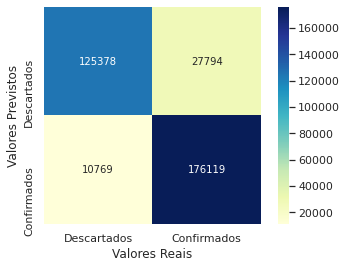

In [24]:
matrix_confusao(y_valid,
                y_pred,
                class_names)

# Árvore de Decisão

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Cria objeto do classificador -  DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Treina o modelo com o dataset de treino
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [27]:
# Faz predição com o dataset de teste (valid) 
y_pred = model.predict(X_valid)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean square error:  %.2f' % mean_squared_error(y_valid, y_pred))
print('Mean absolute error: %.2f' % mean_absolute_error(y_valid, y_pred))
#O coeficiente de determinação: 100% é a predição prefeita.
print('Coefficient of determination (R2): %.2f%%' % (r2_score(y_valid, y_pred)*100))
print('\n\n')

from sklearn import metrics
print(metrics.classification_report(y_valid, y_pred, target_names=class_names))

Mean square error:  0.02
Mean absolute error: 0.02
Coefficient of determination (R2): 90.51%



              precision    recall  f1-score   support

 Descartados       1.00      0.95      0.97    136147
 Confirmados       0.97      1.00      0.98    203913

    accuracy                           0.98    340060
   macro avg       0.98      0.97      0.98    340060
weighted avg       0.98      0.98      0.98    340060



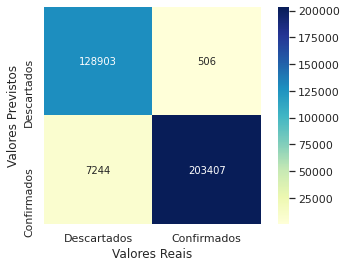

In [29]:
matrix_confusao(y_valid,
                y_pred,
                class_names)

[Text(334.8, 380.52, 'X[15] <= 2.5\ngini = 0.48\nsamples = 793473\nvalue = [317380, 476093]'),
 Text(167.4, 271.8, 'X[16] <= 2.5\ngini = 0.343\nsamples = 609787\nvalue = [133904, 475883]'),
 Text(83.7, 163.07999999999998, 'X[18] <= 2.5\ngini = 0.113\nsamples = 505770\nvalue = [30530, 475240]'),
 Text(41.85, 54.360000000000014, 'gini = 0.065\nsamples = 491615\nvalue = [16634, 474981]'),
 Text(125.55000000000001, 54.360000000000014, 'gini = 0.036\nsamples = 14155\nvalue = [13896, 259]'),
 Text(251.10000000000002, 163.07999999999998, 'X[15] <= 1.5\ngini = 0.012\nsamples = 104017\nvalue = [103374, 643]'),
 Text(209.25, 54.360000000000014, 'gini = 0.146\nsamples = 2427\nvalue = [2234, 193]'),
 Text(292.95, 54.360000000000014, 'gini = 0.009\nsamples = 101590\nvalue = [101140, 450]'),
 Text(502.20000000000005, 271.8, 'X[16] <= 1.5\ngini = 0.002\nsamples = 183686\nvalue = [183476, 210]'),
 Text(418.5, 163.07999999999998, 'X[2] <= 0.5\ngini = 0.018\nsamples = 5019\nvalue = [4973, 46]'),
 Text(3

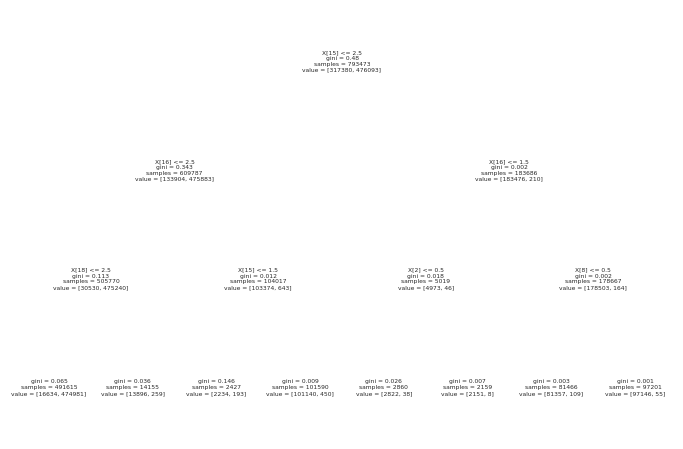

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(model)
#tree.plot_tree(model.fit(X_train, y_train)) 